We import the needed libraries for our analysis as below:

In [214]:
import numpy as np
import pandas as pd
import matplotlib as mpl
#mpl.use("agg")
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.tree 
#matplotlib.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus

%matplotlib inline
my_dpi = 300

Importing the data:

In [38]:
full_data = pd.read_csv("DataFrame.csv")

We check the number of the missing values of the dataset:

In [39]:
missing_values_count = full_data.isnull().sum()
total_cells = np.product(full_data.shape)
total_missing = missing_values_count.sum()
missing_percent = total_missing / total_cells
print(missing_values_count)
print('missing_percent = ' + str(round(missing_percent,2)*100) + '%')

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64
missing_percent = 8.0%


We assess the number of the each animal type:

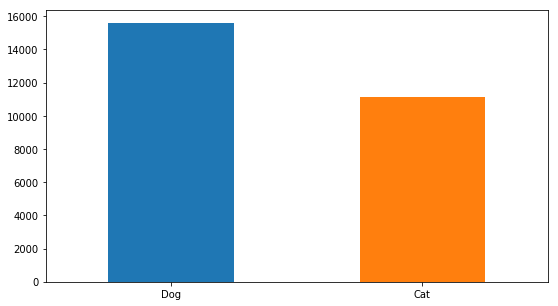

In [107]:
AnimalType = full_data["AnimalType"].value_counts()
plot1 = AnimalType.plot(kind='bar' , rot = 0,figsize=(9,5))
plot1.figure.savefig(fname='figures/animal_type_num.png',dpi=my_dpi)

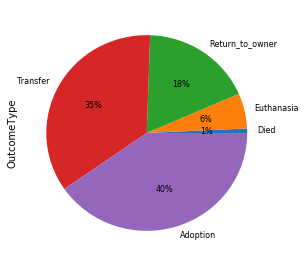

In [132]:
AnimalOutcome = full_data.OutcomeType.value_counts().sort_values()
plot2 = AnimalOutcome.plot(kind='pie',figsize=(4.5,4.5),fontsize=8, autopct='%.0f%%')
plot2.figure.savefig(fname='figures/outcome_pie_plot.png',dpi=100)

We find the number of the distinct names of the animals.

In [42]:
print ('Number of unique names is: '+ str(len(full_data.Name.unique())))

Number of unique names is: 6375


We find the number of NA's in the dataset as below:

In [43]:
print('Number of names = ' + str(full_data.Name.count()))
print('Number of NA''s in names = ' + str(full_data.Name.isna().sum()))

Number of names = 19038
Number of NAs in names = 7691


In [44]:
#Adding column called HasName
idx_null =full_data['Name'].isnull();
# print(idx_null);

full_data.Name[idx_null]= 0
full_data.Name[~idx_null] = 1
full_data.rename(columns={'Name':'HasName'}, inplace=True)
print(full_data)

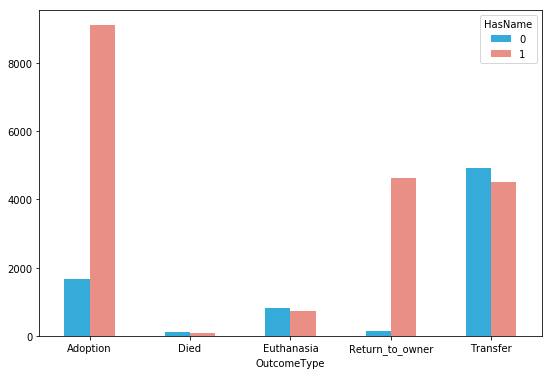

In [137]:
AnimalName = full_data[['HasName','OutcomeType']].groupby(['OutcomeType','HasName']).size().unstack()
plot3 = AnimalName.plot(kind='bar',color=['#34ABD8','#E98F85'],figsize=(9,6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plot3.set_autoscale_on
plot3.figure.savefig(fname='figures/outcome_hasname_plot.png',dpi=150)

In [70]:
#seperating Date and Time into other columns
full_data['Date'] = pd.to_datetime(full_data['DateTime']).dt.date
full_data['Time'] = pd.to_datetime(full_data['DateTime']).dt.time

In [119]:
#converting Date to Month and Weekday
full_data['Month'] = pd.DatetimeIndex(full_data['Date']).month
full_data['Weekday'] = pd.to_datetime(full_data['DateTime']).dt.dayofweek

full_data['Time'] = pd.to_datetime(full_data['DateTime'])
full_data['WorkHour']=full_data.Time.dt.hour

In [120]:
#Changing column work hour to 0 and 1
idx_workhour = pd.np.less(full_data['WorkHour'],16)
# print(idx_workhour);
full_data.WorkHour[idx_workhour]= 1
full_data.WorkHour[~idx_workhour] = 0
# print(full_data)

C:\Users\njadidoleslam\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\njadidoleslam\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


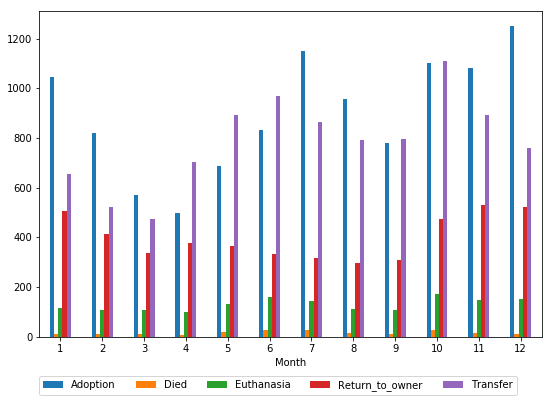

In [173]:
AnimalMonth = full_data[['Month','OutcomeType']].groupby(['Month','OutcomeType']).size().unstack()
plot4 = AnimalMonth.plot(kind='bar',figsize=(9,6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plot4.legend(bbox_to_anchor=(0.95, -0.12), loc=1, borderaxespad=0.,ncol=5)
plot4.figure.savefig(fname='figures/outcome_month_plot.png',dpi=my_dpi)

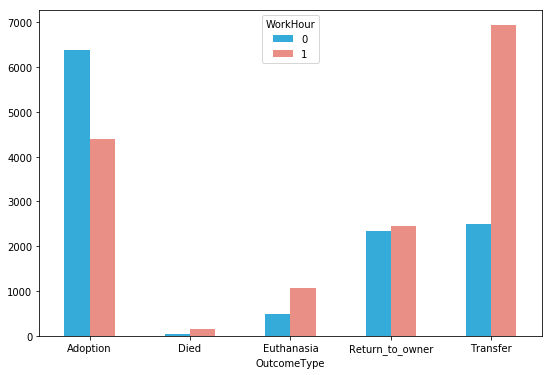

In [139]:
AnimalWork = full_data[['WorkHour','OutcomeType']].groupby(['OutcomeType','WorkHour']).size().unstack()
plot5 = AnimalWork.plot(kind='bar',color=['#34ABD8','#E98F85'],figsize=(9,6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plot5.figure.savefig(fname='figures/animal_work.png',dpi=my_dpi)

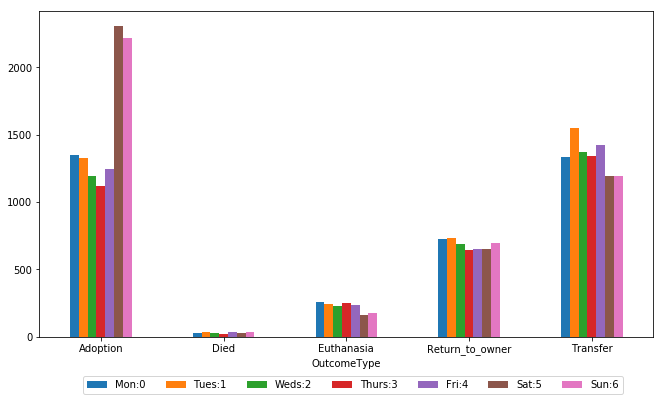

In [172]:
AnimalWork = full_data[['Weekday','OutcomeType']].groupby(['OutcomeType','Weekday']).size().unstack()
plot6 = AnimalWork.plot(kind='bar',figsize=(11,6))
locs, labels = plt.xticks()
days = ('Mon:0','Tues:1','Weds:2','Thurs:3','Fri:4','Sat:5','Sun:6')
plt.setp(labels, rotation=0)
plot6.legend(bbox_to_anchor=(0.95, -0.12), loc=1, borderaxespad=0.,ncol=7,labels =days)
plot6.figure.savefig(fname='figures/animal_weekdays.png',dpi=my_dpi)

In [177]:
#extracting Intact column from SexuponOutcome:
full_data.iloc[3174,6] = 'Unknown'
full_data['Intact']=0

for i in range(26729):
    if 'Intact' in full_data.iloc[i,6]:
        full_data.iloc[i,15] = 1
    elif 'Unknown' in full_data.iloc[i,6] :
        full_data.iloc[i,15] = 'Unknown'
    else:
        full_data.iloc[i,15] = 0


In [178]:
#extracting Sex column from SexuponOutcome:
full_data['Sex']=0
for i in range(26729):
    if 'Male' in full_data.iloc[i,6]:
        full_data.iloc[i,16] = 'Male'
    elif 'Unknown' in full_data.iloc[i,6] :
        full_data.iloc[i,16] = 'Unknown'
    elif 'Female' in full_data.iloc[i,6]:
        full_data.iloc[i,16] = 'Female'

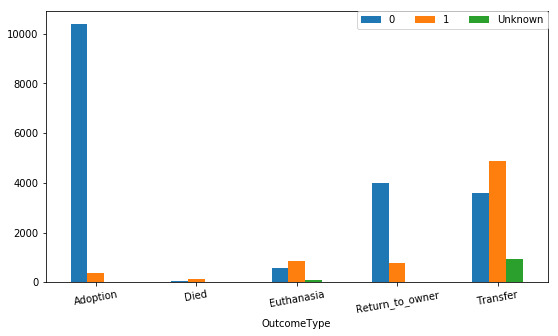

In [197]:
AnimalIntact = full_data[['Intact','OutcomeType']].groupby(['OutcomeType','Intact']).size().unstack()
plot7 = AnimalIntact.plot(kind='bar',figsize = (9,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=10)
plot7.legend(bbox_to_anchor=(1, 1.0), loc=0, borderaxespad=0.,ncol=3)
plot7.figure.savefig(fname='figures/AnimalIntact.png',dpi=my_dpi)

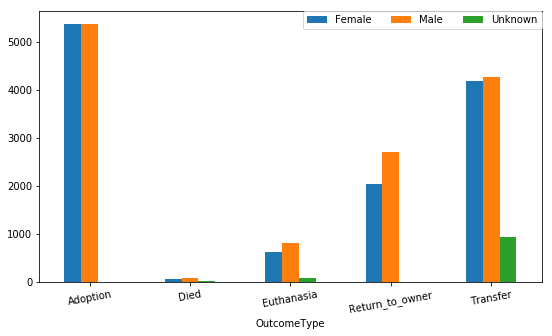

In [198]:
AnimalSex = full_data[['Sex','OutcomeType']].groupby(['OutcomeType','Sex']).size().unstack()
plot8 = AnimalSex.plot(kind='bar',figsize = (9,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=10)
plot8.legend(bbox_to_anchor=(1, 1.0), loc=0, borderaxespad=0.,ncol=3)
plot8.figure.savefig(fname='figures/AnimalSex.png',dpi=my_dpi)

In [199]:
def ext_nbr(input_str):
    out_number = ''
    for x in input_str:
        if x.isdigit():
            out_number += x
    return int(out_number)

In [200]:
full_data['Age_Day']=0
for i in range(26729):
    if pd.isna(full_data.iloc[i,7]):
        continue
    else:  
        num = ext_nbr(full_data.iloc[i,7])
        if 'week' in full_data.iloc[i,7]:
            full_data.iloc[i,17] = num * 7
        elif 'month' in full_data.iloc[i,7]:
            full_data.iloc[i,17] = num *30
        elif 'year' in full_data.iloc[i,7]:
            full_data.iloc[i,17] = num *365

In [201]:
full_data['Age_Day'].fillna(full_data['Age_Day'].mean())

0         365
1         365
2         730
3          21
4         730
5          30
6          21
7          21
8         150
9         365
10        730
11        730
12       1460
13        730
14        365
15         90
16         21
17         14
18        730
19        365
20         60
21        365
22        730
23        300
24         60
25         30
26        180
27       1825
28         60
29       2555
         ... 
26699     730
26700     300
26701     330
26702     730
26703    2190
26704      28
26705      60
26706      60
26707     365
26708     730
26709      30
26710      30
26711     365
26712    4380
26713    6570
26714      60
26715      60
26716      60
26717    3285
26718      60
26719     730
26720      60
26721    1825
26722     150
26723    2190
26724      30
26725      90
26726    1460
26727      28
26728     365
Name: Age_Day, Length: 26729, dtype: int64

In [202]:
full_data['LifeSpan'] = 0
for i in range(len(full_data)):
    if full_data.iloc[i,5] == 'Dog':
        if full_data.iloc[i,17] < 350:
            full_data.iloc[i,18] = 1 #infant
        elif full_data.iloc[i,17] < 2600:
            full_data.iloc[i,18] = 2 #adult
        else:
            full_data.iloc[i,18] = 3 #old
    else:
        if full_data.iloc[i,17] < 350:
            full_data.iloc[i,18] = 1 #infant
        elif full_data.iloc[i,17] < 3600:
            full_data.iloc[i,18] = 2 #adult
        else:
            full_data.iloc[i,18] = 3 #old
        

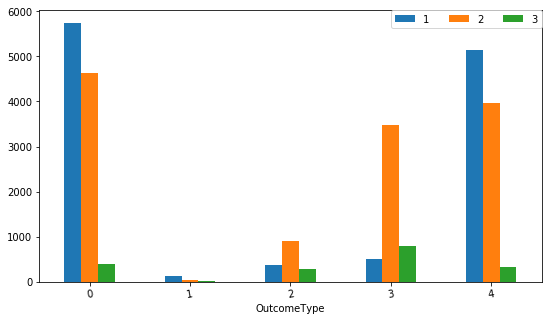

In [228]:
Animalspan = full_data[['LifeSpan','OutcomeType']].groupby(['OutcomeType','LifeSpan']).size().unstack()
plot9 = Animalspan.plot(kind='bar',figsize = (9,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=10)
plot9.legend(bbox_to_anchor=(1, 1.0), loc=0, borderaxespad=0.,ncol=3)
plot9.figure.savefig(fname='figures/Animalspan.png',dpi=my_dpi)

In [204]:
#deletes '/' and Mix from Breed
def ext_str(in_str):
    x=''
    if 'Mix' in in_str:
        out_str = in_str.replace("Mix", "")
    elif '/' in in_str:
        out_str = ''
        for x in in_str:
            if x=='/':
                break
            else:
                out_str += x
    else:
        out_str = in_str
    return (out_str)

In [205]:
full_data['Breed_simplified']=''
for i in range(len(full_data)):
    full_data.iloc[i,19] = ext_str(full_data.iloc[i,8])


In [206]:
full_data['Color_simplified']=''
for i in range(len(full_data)):
    full_data.iloc[i,20] = ext_str(full_data.iloc[i,9])

In [207]:
#converting categorial feature to numerical
full_data["AnimalType"] = full_data["AnimalType"].astype('category')
full_data["AnimalType"] = full_data["AnimalType"].cat.codes

full_data["Sex"] = full_data["Sex"].astype('category')
full_data["Sex"] = full_data["Sex"].cat.codes

full_data["Breed_simplified"] = full_data["Breed_simplified"].astype('category')
full_data["Breed_simplified"] = full_data["Breed_simplified"].cat.codes

full_data["Color_simplified"] = full_data["Color_simplified"].astype('category')
full_data["Color_simplified"] = full_data["Color_simplified"].cat.codes

full_data["Intact"] = full_data["Intact"].astype('category')
full_data["Intact"] = full_data["Intact"].cat.codes

full_data["OutcomeType"] = full_data["OutcomeType"].astype('category')
full_data["OutcomeType"] = full_data["OutcomeType"].cat.codes

In [208]:
X = full_data.ix[ :,['HasName','AnimalType','Month','Weekday','WorkHour','Intact','Sex','LifeSpan','Breed_simplified','Color_simplified']]
y = full_data['OutcomeType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\njadidoleslam\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [215]:
#       ********* Random Forest ********
RF_Model = RandomForestRegressor(n_estimators = 100)#, random_state = 42)
RF_Model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [216]:
# computing feature importance
importances = RF_Model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 5 (0.260124)
2. feature 8 (0.173123)
3. feature 2 (0.143348)
4. feature 9 (0.131328)
5. feature 3 (0.100646)
6. feature 7 (0.084022)
7. feature 6 (0.035635)
8. feature 4 (0.028490)
9. feature 0 (0.027526)
10. feature 1 (0.015757)


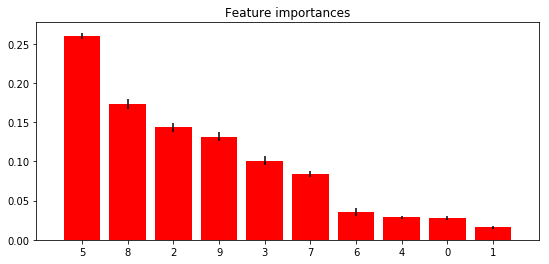

In [239]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(9,4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.savefig(fname='figures/feature_importance.png',dpi=my_dpi)

In [241]:
# Use the Model to predict the test data
pred_RF = RF_Model.predict(X_test)

# Calculate the absolute errors
errors_RF = abs(pred_RF - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_RF), 2), 'degrees.')

Mean Absolute Error: 1.1 degrees.


In [242]:
#         ******** SVM ********
SVM_Model = svm.SVC()
SVM_Model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [243]:
# Use the Model to predict the test data
pred_SVM = SVM_Model.predict(X_test)

# Calculate the absolute errors
errors_SVM = abs(pred_SVM - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_SVM), 2), 'degrees.')

#Calculate Accuracy
Acc_SVM = accuracy_score(pred_SVM,y_test)

#Print out Accuracy
print('Accuracy           :', round(Acc_SVM,3))

Mean Absolute Error: 0.74 degrees.
Accuracy           : 0.769


In [244]:
#  *********** ADABOOST *********
ADA_Model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model = ADA_Model.fit(X, y)

In [245]:
# Use the Model to predict the test data
pred_ADA = ADA_Model.predict(X_test)

# Calculate the absolute errors
errors_ADA = abs(pred_ADA - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#Calculate Accuracy
Acc_ADA = accuracy_score(pred_ADA,y_test)

#Print out Accuracy
print('Accuracy           :', round(Acc_ADA , 3))

Mean Absolute Error: 0.11 degrees.
Accuracy           : 0.636


In [246]:
#    ************* Decision Tree ************
DT_Model=DecisionTreeClassifier()
DT_Model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [247]:
# Use the Model to predict the test data
pred_DT = DT_Model.predict(X_test)

# Calculate the absolute errors
errors_DT = abs(pred_DT - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#Calculating Accuracy
Acc_DT = accuracy_score(pred_DT,y_test)

#Printing out Accuracy
print('Accuracy           :', round(Acc_DT, 3))

Mean Absolute Error: 0.11 degrees.
Accuracy           : 0.963


In [248]:
acc_array = (Acc_ADA,Acc_DT,Acc_SVM)
acc_array = (errors_ADA,errors_DT,errors_SVM)
plot10 = plt.bar(acc_array,figsize = (9,6))

SyntaxError: invalid syntax (<ipython-input-248-bb9eccb7af76>, line 2)